In [36]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question:
    Is there a certain genre that has the highest sales?

## 1- Expectations:   
    - It's expected that there is a genre which is preferred by the users and has the highest sales.

## 2- Data Collection: 
    

## Read data 

In [37]:
df = read_data(kind='dataset')

## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will perform mode imputation for categorical features and KNN imputation for numerical features, since we are interested in exploring the sales' features 

In [38]:
df= handle_missing_values(df, handling_method='mode_knn', neighbors=5)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0


## Handle outliers
    - Number of outliers in ['NA_Sales','EU_Sales','JP_Sales'] is very huge, so it's not the best action to remove all of them.
    - Instead we can remove the rows having more than 1 outlier in these 3 columns.

In [39]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],)
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4760
Number of original rows:  11959


- This is safer than removing 10317 rows (As shown in Data Exploration section)

## Analysis

### Genre Distribution

In [42]:
genres=df['Genre'].value_counts()
genres

Action          2467
Sports          1602
Misc            1341
Adventure       1136
Racing           925
Shooter          899
Role-Playing     862
Simulation       654
Platform         584
Fighting         535
Strategy         502
Puzzle           452
Name: Genre, dtype: int64

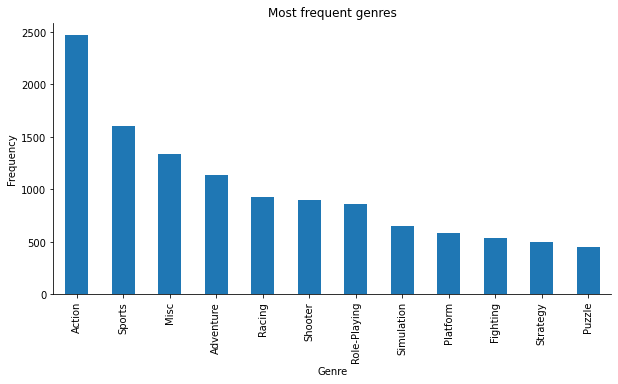

In [ ]:
genres.plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.title('Most frequent genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

### Average Sales for each genre

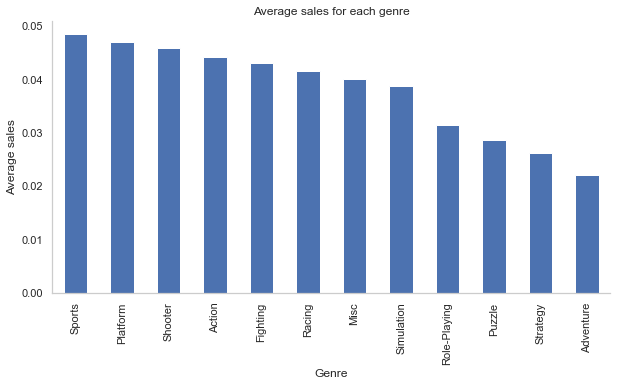

In [ ]:
df_genre = df.groupby('Genre').mean(numeric_only=True)
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean(axis=1)
df_genre = df_genre.sort_values(by='Total_Sales', ascending=False)
df_genre['Total_Sales'].plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.grid(False)
plt.title('Average sales for each genre')
plt.xlabel('Genre')
plt.ylabel('Average sales')
plt.show()

In [ ]:
# genres = df['Global_Sales'].groupby(df['Genre']).mean().sort_values(ascending=False).to_frame()
# figure = plt.figure(figsize=(10,10))
# sns.set(style="whitegrid")
# plt.pie(genres['Global_Sales'],labels = genres.index,autopct = '%1.1f%%') 
# plt.title('Global Sales Distribution by their average')
# plt.show()


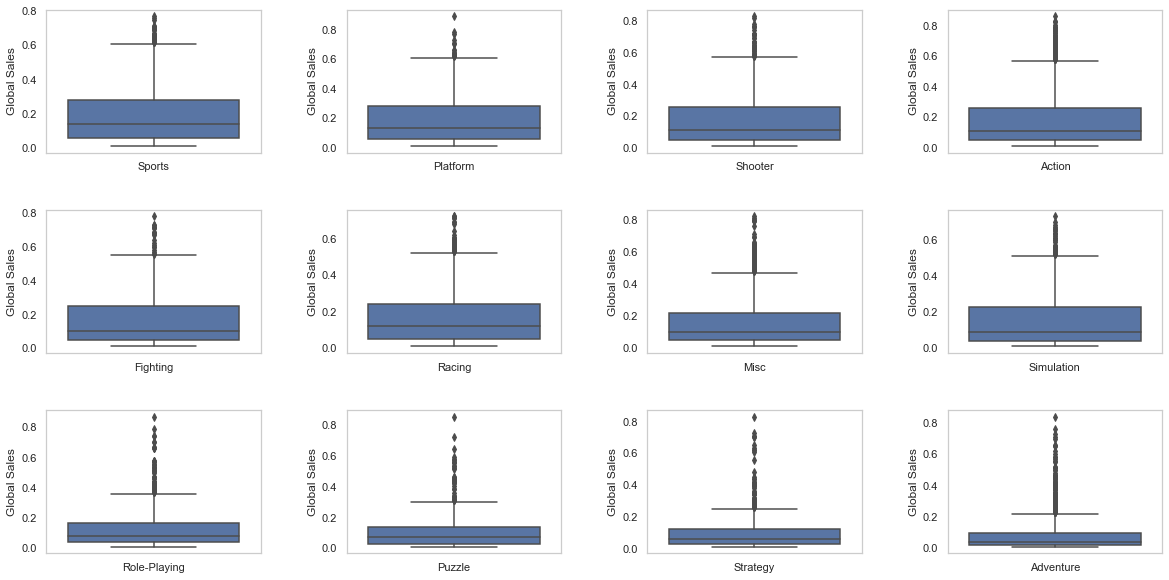

In [47]:
genres_summary=df.groupby('Genre')['Global_Sales'].describe().sort_values(by='mean', ascending=False)
genres_summary

# draw a boxplot to show distributions with respect to categories.
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (idx, row) in enumerate(genres_summary.iterrows()):
    ax = axes[int(i/4), i%4]
    sns.boxplot(x='Genre', y='Global_Sales', data=df[df['Genre']==idx], ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Global Sales')
    ax.grid(False)

## 3- Comparing Expectations to data:
    - Sports genre has the highest sales as shown in the plots, so the expectations match the data.
        